# If working on this, put API key

# The Guardian Data Acquisition and Analysis
Utilized The Guardian's API to acquire articles from 2020 - present, in the 'world' section where 'Philippines' has been mentioned, followed by a trend analysis of the newspaper's publication.

Skills used:
- used pandas, matplotlib and nltk libraries
- acquiring data using API
- tried a tiny bit of Natural Language Processing
- EDA on The Guardian's articles

Findings:
- It was in **May 2022** that The Guardian published the most articles about the Philippines, possibly because of the PH elections.
- The Guardian published the most Philippines-related articles in **2020**, compared to its succeeding years.
- Most articles were under the **'World news'** section, followed distantly by the **'Global development'** section.
- The top words used in the headlines are as follows: '**philippines**,' '**maria**,' '**marcos**,' '**china**,' '**coronavirus**,' and '**ressa**.' These could give us an idea of the topics The Guardian commonly covered about the Philippines.


Data Acquisition adopted from Analyst Adithya's video (https://youtu.be/Nf1U62XxDmU?si=yq4TXr0USzKLca6S)

In [6]:
# import libraries

import pandas as pd
import requests

import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from collections import Counter

In [101]:
# API key: here

In [9]:
url = 'https://content.guardianapis.com/world/philippines?from-date=2020-01-01&api-key=putHere&page=1'

In [88]:
response = requests.get(url)
print(response)

<Response [200]>


In [89]:
# json

x = response.json()
print(x)

{'response': {'status': 'ok', 'userTier': 'developer', 'total': 225, 'startIndex': 1, 'pageSize': 10, 'currentPage': 1, 'pages': 23, 'orderBy': 'newest', 'tag': {'id': 'world/philippines', 'type': 'keyword', 'sectionId': 'world', 'sectionName': 'World news', 'webTitle': 'Philippines', 'webUrl': 'https://www.theguardian.com/world/philippines', 'apiUrl': 'https://content.guardianapis.com/world/philippines'}, 'results': [{'id': 'world/2023/oct/13/ferdinand-marcos-jr-drops-philippines-holiday-marking-toppling-of-father', 'type': 'article', 'sectionId': 'world', 'sectionName': 'World news', 'webPublicationDate': '2023-10-13T11:20:09Z', 'webTitle': 'Ferdinand Marcos Jr drops Philippines holiday marking toppling of father', 'webUrl': 'https://www.theguardian.com/world/2023/oct/13/ferdinand-marcos-jr-drops-philippines-holiday-marking-toppling-of-father', 'apiUrl': 'https://content.guardianapis.com/world/2023/oct/13/ferdinand-marcos-jr-drops-philippines-holiday-marking-toppling-of-father', 'isH

In [90]:
# loop through all pages

urllist = []

for i in range(1,24): 
    a = 'https://content.guardianapis.com/world/philippines?from-date=2020-01-01&api-key=e9eaf2ef-00d6-47a6-89cf-10386627a2f2&page='
    b = str(i)
    c= a+b
    urllist.append(c)

urllist

['https://content.guardianapis.com/world/philippines?from-date=2020-01-01&api-key=e9eaf2ef-00d6-47a6-89cf-10386627a2f2&page=1',
 'https://content.guardianapis.com/world/philippines?from-date=2020-01-01&api-key=e9eaf2ef-00d6-47a6-89cf-10386627a2f2&page=2',
 'https://content.guardianapis.com/world/philippines?from-date=2020-01-01&api-key=e9eaf2ef-00d6-47a6-89cf-10386627a2f2&page=3',
 'https://content.guardianapis.com/world/philippines?from-date=2020-01-01&api-key=e9eaf2ef-00d6-47a6-89cf-10386627a2f2&page=4',
 'https://content.guardianapis.com/world/philippines?from-date=2020-01-01&api-key=e9eaf2ef-00d6-47a6-89cf-10386627a2f2&page=5',
 'https://content.guardianapis.com/world/philippines?from-date=2020-01-01&api-key=e9eaf2ef-00d6-47a6-89cf-10386627a2f2&page=6',
 'https://content.guardianapis.com/world/philippines?from-date=2020-01-01&api-key=e9eaf2ef-00d6-47a6-89cf-10386627a2f2&page=7',
 'https://content.guardianapis.com/world/philippines?from-date=2020-01-01&api-key=e9eaf2ef-00d6-47a6-89c

In [91]:
# function to read all the urls in urllist into json

info = []

def json(url1):
    response = requests.get(url1)
    x = response.json()
    info.append(x)

In [93]:
# run json(url1) function in all urls

output = [json(url1) for url1 in urllist]

In [94]:
info

[{'response': {'status': 'ok',
   'userTier': 'developer',
   'total': 225,
   'startIndex': 1,
   'pageSize': 10,
   'currentPage': 1,
   'pages': 23,
   'orderBy': 'newest',
   'tag': {'id': 'world/philippines',
    'type': 'keyword',
    'sectionId': 'world',
    'sectionName': 'World news',
    'webTitle': 'Philippines',
    'webUrl': 'https://www.theguardian.com/world/philippines',
    'apiUrl': 'https://content.guardianapis.com/world/philippines'},
   'results': [{'id': 'world/2023/oct/13/ferdinand-marcos-jr-drops-philippines-holiday-marking-toppling-of-father',
     'type': 'article',
     'sectionId': 'world',
     'sectionName': 'World news',
     'webPublicationDate': '2023-10-13T11:20:09Z',
     'webTitle': 'Ferdinand Marcos Jr drops Philippines holiday marking toppling of father',
     'webUrl': 'https://www.theguardian.com/world/2023/oct/13/ferdinand-marcos-jr-drops-philippines-holiday-marking-toppling-of-father',
     'apiUrl': 'https://content.guardianapis.com/world/2023

In [95]:
# finding the total number of pages
info[0]['response']['pages']

23

In [96]:
# getting the result of the latest article headline
info[0]['response']['results'][0]['webTitle']

'Ferdinand Marcos Jr drops Philippines holiday marking toppling of father'

In [97]:
# looping through all the articles

finallist = []

try:
    for page in range(0,24):
        for article in range (0,10):
            value=dict(webtitle=info[page]['response']['results'][article]['webTitle'],
            sectionname=info[page]['response']['results'][article]['sectionName'],
            publicationdate=info[page]['response']['results'][article]['webPublicationDate'])
            finallist.append(value)
except IndexError:
    print('done')


done


In [98]:
finallist

[{'webtitle': 'Ferdinand Marcos Jr drops Philippines holiday marking toppling of father',
  'sectionname': 'World news',
  'publicationdate': '2023-10-13T11:20:09Z'},
 {'webtitle': 'Philippine fishers killed after collision with suspected oil tanker in South China Sea',
  'sectionname': 'World news',
  'publicationdate': '2023-10-04T05:05:54Z'},
 {'webtitle': '‘Risk of miscalculation’ rises in South China Sea as Beijing ramps up aggressive tactics',
  'sectionname': 'World news',
  'publicationdate': '2023-09-29T01:57:18Z'},
 {'webtitle': 'Last Days at Sea review – evocative documentary about a boy leaving his picturesque childhood behind',
  'sectionname': 'Film',
  'publicationdate': '2023-09-18T06:00:21Z'},
 {'webtitle': 'Marise Payne to quit parliament – as it happened',
  'sectionname': 'Australia news',
  'publicationdate': '2023-09-08T08:06:20Z'},
 {'webtitle': 'British-Australian man jailed in Philippines claims authorities fabricated evidence',
  'sectionname': 'World news',
 

In [99]:
datanew = pd.DataFrame(finallist)
datanew

,webtitle,sectionname,publicationdate
0,Ferdinand Marcos Jr drops Philippines holiday ...,World news,2023-10-13T11:20:09Z
1,Philippine fishers killed after collision with...,World news,2023-10-04T05:05:54Z
2,‘Risk of miscalculation’ rises in South China ...,World news,2023-09-29T01:57:18Z
3,Last Days at Sea review – evocative documentar...,Film,2023-09-18T06:00:21Z
4,Marise Payne to quit parliament – as it happened,Australia news,2023-09-08T08:06:20Z
...,...,...,...
220,Philippines races to trace those linked to fir...,Global development,2020-02-02T07:27:38Z
221,'Bleak domineering vision': Amnesty says human...,World news,2020-01-29T16:30:52Z
222,Quezon's Game review – second world war refuge...,Film,2020-01-29T15:00:50Z
223,Weatherwatch: storms and violent tornadoes str...,News,2020-01-15T21:30:14Z


In [100]:
# remove time in datetime
datanew['publicationdate'] = datanew['publicationdate'].str.split('T').str[0]

datanew

,webtitle,sectionname,publicationdate
0,Ferdinand Marcos Jr drops Philippines holiday ...,World news,2023-10-13
1,Philippine fishers killed after collision with...,World news,2023-10-04
2,‘Risk of miscalculation’ rises in South China ...,World news,2023-09-29
3,Last Days at Sea review – evocative documentar...,Film,2023-09-18
4,Marise Payne to quit parliament – as it happened,Australia news,2023-09-08
...,...,...,...
220,Philippines races to trace those linked to fir...,Global development,2020-02-02
221,'Bleak domineering vision': Amnesty says human...,World news,2020-01-29
222,Quezon's Game review – second world war refuge...,Film,2020-01-29
223,Weatherwatch: storms and violent tornadoes str...,News,2020-01-15


# Analysis

In [101]:
datanew['publicationdate'] = pd.to_datetime(datanew['publicationdate'])

## Published articles by year and month

In [102]:
# Group and count the number of articles by month and year
month_count = datanew.groupby([datanew['publicationdate'].dt.year, datanew['publicationdate'].dt.month_name()])['publicationdate'].count()
print(month_count)

# note: February 2021 is missing

publicationdate  publicationdate
2020             April               4
                 August              5
                 December            1
                 February            4
                 January             4
                 July                7
                 June               13
                 March               5
                 May                 6
                 November            4
                 October             4
                 September           7
2021             April               5
                 August              2
                 December            7
                 January             4
                 July                7
                 June                2
                 March               2
                 May                 4
                 November            4
                 October            10
                 September           8
2022             April               4
                 August        

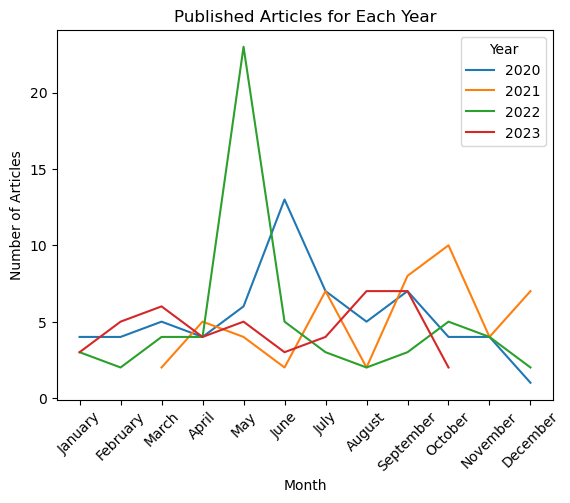

In [104]:
month_count = datanew.groupby([datanew['publicationdate'].dt.year, datanew['publicationdate'].dt.month_name()])['publicationdate'].count()

# Unstack the result to make it suitable for line plotting
month_counts_unstacked = month_count.unstack(0)

# Get a list of all months for x-axis labels
all_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Create a line graph for each year, ensuring proper alignment with x-ticks
years = month_counts_unstacked.columns
for year in years:
    plt.plot(all_months, month_counts_unstacked[year].reindex(all_months, fill_value=0), label=year)

# Labels and title
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.title('Published Articles for Each Year')

# Show the legend
plt.legend(title='Year')
plt.xticks(rotation=45)
plt.show()

## Total articles published per year

In [105]:
year_counts = datanew['publicationdate'].dt.year.value_counts()

print(year_counts)

2020    64
2022    60
2021    55
2023    46
Name: publicationdate, dtype: int64


Text(0.5, 1.0, 'Yearly Occurrences')

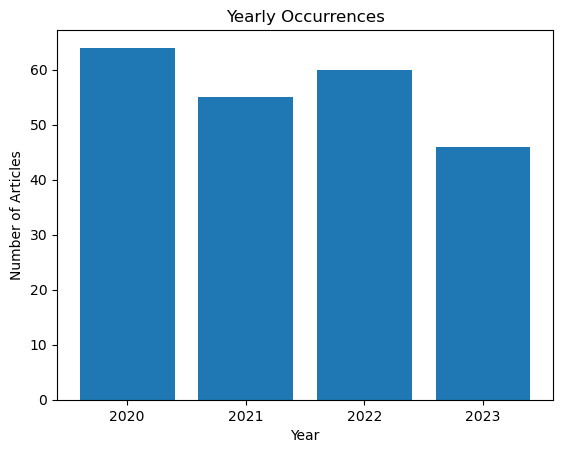

In [106]:
# bar graph of result

plt.bar(year_counts.index, year_counts.values)

# set x-axis (years) to int
plt.xticks(year_counts.index.astype(int))

# labels
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.title('Yearly Occurrences')

## Total articles published per year

In [107]:
month_counts = datanew['publicationdate'].dt.month.value_counts()

print(month_counts)

5     38
9     25
6     23
10    21
7     21
4     17
3     17
8     16
1     14
11    12
2     11
12    10
Name: publicationdate, dtype: int64


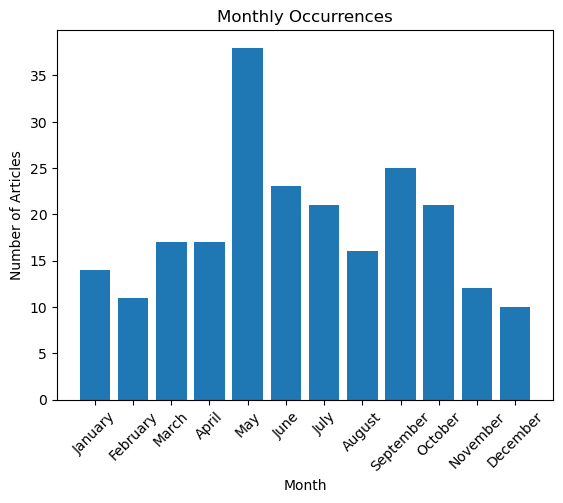

In [108]:
# bar graph of result

plt.bar(month_counts.index, month_counts.values)

# set x-axis (months) to int
plt.xticks(month_counts.index.astype(int))

plt.xticks(range(1, 13), month_counts.values) 

# Set x-axis (months) labels to month names
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.xticks(range(1, 13), month_names, rotation=45)  # Rotate labels for readability

# Labels
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.title('Monthly Occurrences')

# Show the plot
plt.show()

## Average articles published per month

In [109]:
# Calculate the average occurrences of each month across all years
avg_month_count = month_counts.groupby(level=0).mean().sort_values(ascending=False)

print(avg_month_count)

5     38.0
9     25.0
6     23.0
7     21.0
10    21.0
3     17.0
4     17.0
8     16.0
1     14.0
11    12.0
2     11.0
12    10.0
Name: publicationdate, dtype: float64


In [30]:
datanew

,webtitle,sectionname,publicationdate
0,Ferdinand Marcos Jr drops Philippines holiday ...,World news,2023-10-13
1,Philippine fishers killed after collision with...,World news,2023-10-04
2,‘Risk of miscalculation’ rises in South China ...,World news,2023-09-29
3,Last Days at Sea review – evocative documentar...,Film,2023-09-18
4,Marise Payne to quit parliament – as it happened,Australia news,2023-09-08
...,...,...,...
220,Philippines races to trace those linked to fir...,Global development,2020-02-02
221,'Bleak domineering vision': Amnesty says human...,World news,2020-01-29
222,Quezon's Game review – second world war refuge...,Film,2020-01-29
223,Weatherwatch: storms and violent tornadoes str...,News,2020-01-15


## Total sections breakdown

In [26]:
section_counts = datanew['sectionname'].value_counts()
print(section_counts)

World news            132
Global development     32
Environment            13
Film                   11
Australia news         10
Business                4
Opinion                 4
Books                   3
News                    3
Technology              2
Society                 2
US news                 2
UK news                 1
Art and design          1
Football                1
Weather                 1
Music                   1
Sport                   1
Law                     1
Name: sectionname, dtype: int64


# Commonly used words in headline

In [110]:
# customize words to filter out
cus_stopwords = stopwords.words('english') + ['says', 'say']

# function to preprocess and count words
def words_count(text):
    # split webtitle into words
    words = text.split()

    # remove punctuations, covert to lowercase
    words = [word.strip(' .,-–!?(){}[]"\'/').lower() for word in words]
    
    # remove stopwords
    words = [word for word in words if word not in cus_stopwords]
    
    # filter empty strings
    words = [word for word in words if word]
    
    # count words
    word_count = Counter(words)
    
    return word_count

# apply function
words_count = datanew['webtitle'].apply(words_count)

# combine word counts from all rows
combined_counts = words_count.sum()

# get most common words
common_words = combined_counts.most_common()

# print
print(common_words[:10])

[('philippines', 82), ('maria', 21), ('marcos', 17), ('china', 14), ('coronavirus', 14), ('ressa', 12), ('filipino', 11), ('nobel', 11), ('philippine', 10), ('covid', 10)]


In [111]:
top_words = pd.DataFrame(common_words[:20])

top_words

,0,1
0,philippines,82
1,maria,21
2,marcos,17
3,china,14
4,coronavirus,14
5,ressa,12
6,filipino,11
7,nobel,11
8,philippine,10
9,covid,10
